# **БФБО-05-23 Баранов Арсений Юрьевич**

In [27]:
%matplotlib inline

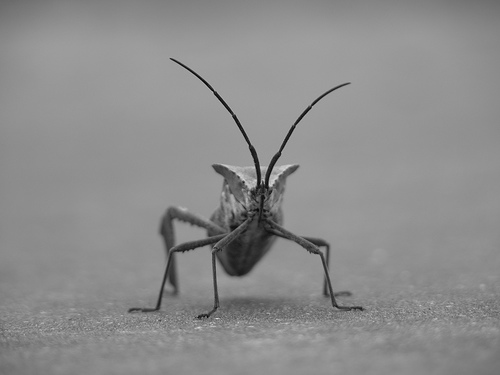

Это 24-битное изображение RGB PNG (по 8 бит для каждого из R, G, B). В зависимости от того, откуда вы берете данные, другие типы изображений, с которыми вы, скорее всего, столкнетесь, — это изображения RGBA, которые допускают прозрачность, или одноканальные изображения в оттенках серого (яркость). Загрузите stinkbug.png на свой компьютер для остальной части этого руководства.

Мы используем Pillow, чтобы открыть изображение (с помощью PIL.Image.open), и немедленно преобразуем PIL.Image.Imageобъект в 8-битный ( dtype=uint8) массив numpy.

In [28]:
from PIL import Image

import matplotlib.pyplot as plt
import numpy as np

In [29]:
img = np.asarray(Image.open('shrimps.jpg'))
print(repr(img))

array([[[ 5, 14, 23],
        [ 4, 13, 22],
        [ 4, 13, 22],
        ...,
        [ 0, 24, 41],
        [ 0, 24, 41],
        [ 0, 25, 42]],

       [[24, 33, 42],
        [24, 33, 42],
        [22, 31, 40],
        ...,
        [18, 47, 63],
        [18, 47, 63],
        [16, 48, 63]],

       [[31, 39, 50],
        [30, 38, 49],
        [28, 36, 47],
        ...,
        [ 7, 43, 59],
        [ 8, 44, 60],
        [ 7, 44, 60]],

       ...,

       [[10, 30, 41],
        [11, 31, 42],
        [10, 30, 41],
        ...,
        [17, 21, 24],
        [20, 24, 25],
        [21, 25, 26]],

       [[10, 28, 38],
        [11, 29, 39],
        [11, 29, 41],
        ...,
        [23, 24, 26],
        [27, 28, 30],
        [29, 30, 32]],

       [[ 7, 24, 34],
        [ 8, 25, 35],
        [10, 26, 39],
        ...,
        [27, 28, 30],
        [32, 33, 35],
        [36, 37, 39]]], dtype=uint8)


## Построение графиков массивов numpy в виде изображений
Итак, у вас есть данные в массиве numpy (либо импортированные, либо сгенерированные). Давайте отобразим их. В Matplotlib это выполняется с помощью функции imshow(). Здесь мы возьмем объект plot. Этот объект дает вам простой способ манипулировать графиком из подсказки.

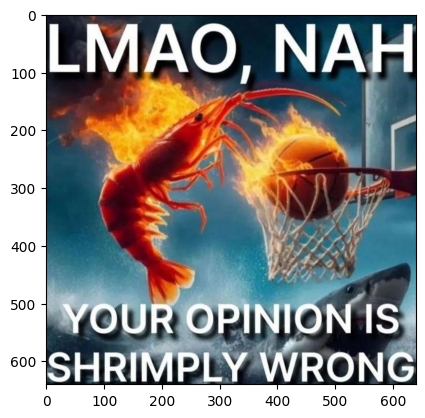

In [30]:
imgplot = plt.imshow(img)

## Применение псевдоцветовых схем к графикам изображений 
Псевдоцвет может быть полезным инструментом для усиления контраста и более легкой визуализации ваших данных. Это особенно полезно при создании презентаций ваших данных с использованием проекторов — их контрастность обычно довольно низкая.

Псевдоцвет имеет значение только для одноканальных, серых, яркостных изображений. В настоящее время у нас есть изображение RGB. Поскольку R, G и B все похожи (см. выше или в ваших данных), мы можем просто выбрать один канал наших данных, используя срез массива (вы можете прочитать больше в руководстве по Numpy ):

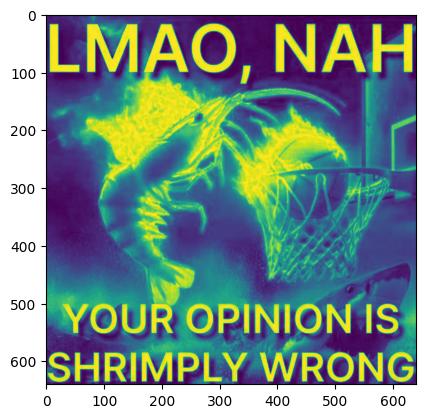

In [31]:
lum_img = img[:, :, 0]
plt.imshow(lum_img)

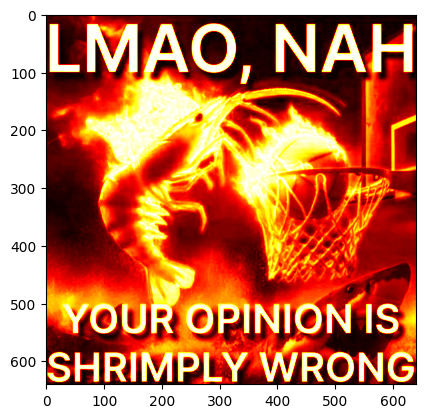

In [32]:
plt.imshow(lum_img, cmap="hot")

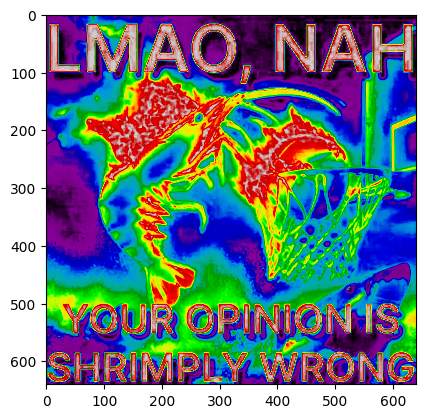

In [33]:
imgplot = plt.imshow(lum_img)
imgplot.set_cmap('nipy_spectral')

### Ссылка на цветовую шкалу 
Полезно иметь представление о том, какое значение представляет цвет. Мы можем сделать это, добавив цветовую полосу к вашей фигуре:

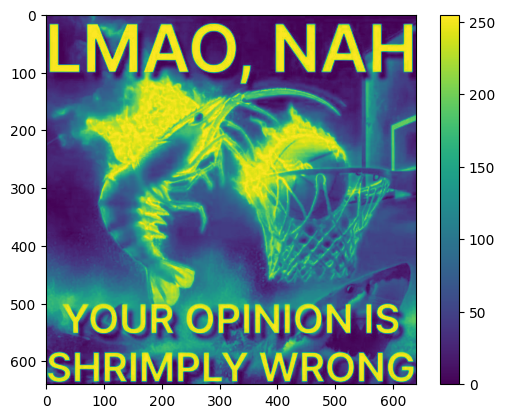

In [34]:
imgplot = plt.imshow(lum_img)
plt.colorbar()

### Проверка определенного диапазона данных 
Иногда вы хотите усилить контрастность изображения или расширить контрастность в определенной области, жертвуя при этом детализацией в цветах, которые не сильно различаются или не имеют значения. Хорошим инструментом для поиска интересных областей является гистограмма. Чтобы создать гистограмму данных нашего изображения, мы используем функцию hist().

(array([2973., 2027., 2349., 2810., 3300., 3972., 3888., 3552., 3381.,
        3025., 2843., 2852., 2978., 2681., 2509., 2362., 2305., 2473.,
        2269., 2128., 2208., 2146., 2147., 2191., 2321., 2382., 2231.,
        2339., 2341., 2221., 2333., 2337., 2351., 2264., 2215., 2200.,
        2243., 2069., 1925., 2059., 2169., 2113., 2260., 2424., 2394.,
        2760., 2651., 2610., 2441., 2675., 2744., 2734., 2900., 2929.,
        2665., 2461., 2363., 2189., 2250., 2431., 2316., 2195., 2268.,
        2140., 2171., 2053., 2018., 1980., 1927., 1861., 1883., 1886.,
        1896., 1848., 1942., 1835., 1674., 1721., 1810., 1704., 1716.,
        1659., 1744., 1711., 1734., 1745., 1694., 1658., 1748., 1770.,
        1707., 1641., 1686., 1629., 1615., 1736., 1612., 1624., 1672.,
        1662., 1593., 1648., 1655., 1717., 1528., 1610., 1557., 1447.,
        1530., 1478., 1447., 1372., 1411., 1376., 1416., 1342., 1320.,
        1374., 1442., 1371., 1291., 1315., 1298., 1264., 1302., 1265.,
      

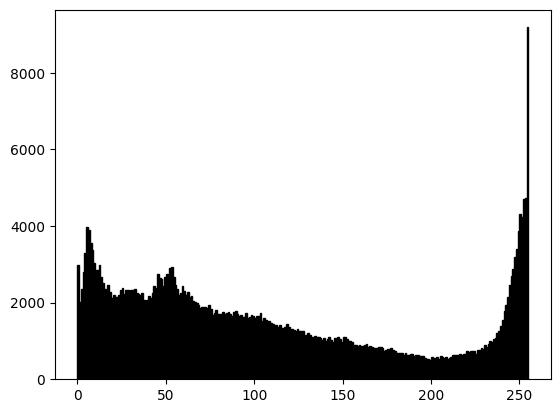

In [35]:
plt.hist(lum_img.ravel(), bins=range(256), fc='k', ec='k')

Чаще всего «интересная» часть изображения находится около пика, и вы можете получить дополнительный контраст, обрезав области выше и/или ниже пика. На нашей гистограмме похоже, что в верхнем конце не так много полезной информации (мало белых объектов на изображении). Давайте настроим верхний предел, чтобы эффективно «увеличить» часть гистограммы. Мы делаем это, устанавливая clim , пределы цветовой карты.

Это можно сделать, передав аргумент ключевого слова clim в вызове imshow.

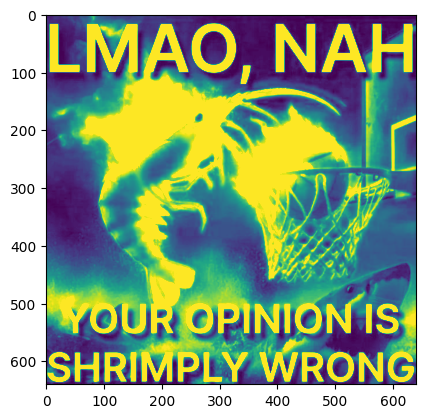

In [36]:
plt.imshow(lum_img, clim=(0, 175))

Это также можно сделать, вызвав set_clim()метод возвращаемого объекта графика изображения, но убедитесь, что вы делаете это в той же ячейке, что и ваша команда построения графика при работе с Jupyter Notebook — это не изменит графики из более ранних ячеек.

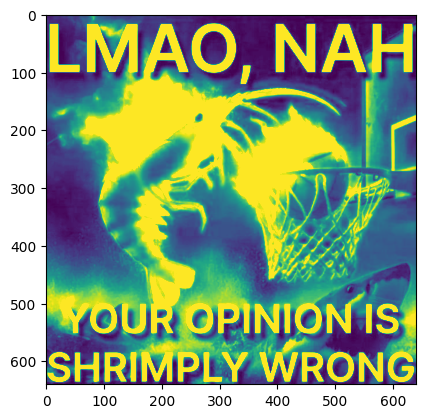

In [37]:
imgplot = plt.imshow(lum_img)
imgplot.set_clim(0, 175)

### Схемы интерполяции массива 
Интерполяция вычисляет, каким должен быть цвет или значение пикселя, согласно различным математическим схемам. Одно из распространенных мест, где это происходит, — это изменение размера изображения. Количество пикселей меняется, но вам нужна та же информация. Поскольку пиксели дискретны, есть недостающее пространство. Интерполяция — это то, как вы заполняете это пространство. Вот почему ваши изображения иногда выглядят пикселизированными, когда вы их увеличиваете. Эффект более выражен, когда разница между исходным изображением и расширенным изображением больше. Давайте возьмем наше изображение и уменьшим его. Мы фактически отбрасываем пиксели, оставляя только несколько избранных. Теперь, когда мы его отображаем, эти данные увеличиваются до размера на вашем экране. Старых пикселей больше нет, и компьютеру приходится рисовать пиксели, чтобы заполнить это пространство.

Мы воспользуемся библиотекой Pillow, которую использовали для загрузки изображения, а также для изменения его размера.

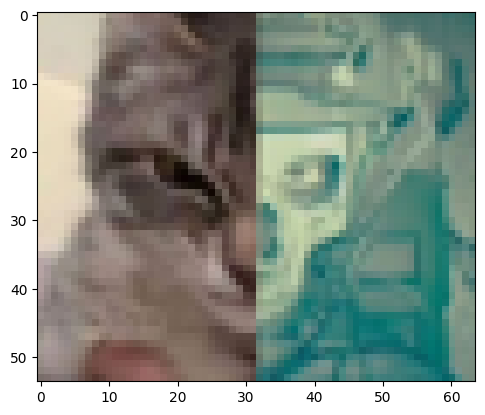

In [38]:
img = Image.open('catghost.jpg')
img.thumbnail((64, 64))  # resizes image in-place
imgplot = plt.imshow(img)

Здесь мы используем интерполяцию по умолчанию («ближайшая»), поскольку мы не указали imshow()аргумент интерполяции.

Давайте попробуем другие. Вот «билинейный»:

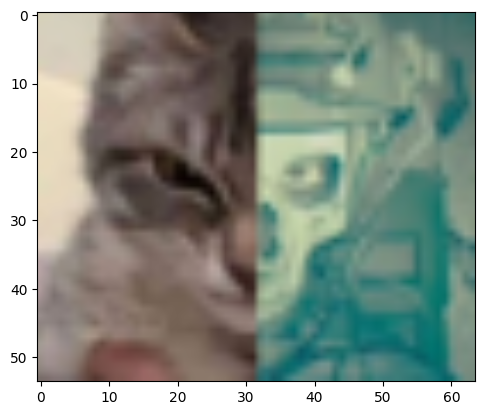

In [39]:
imgplot = plt.imshow(img, interpolation="bilinear")

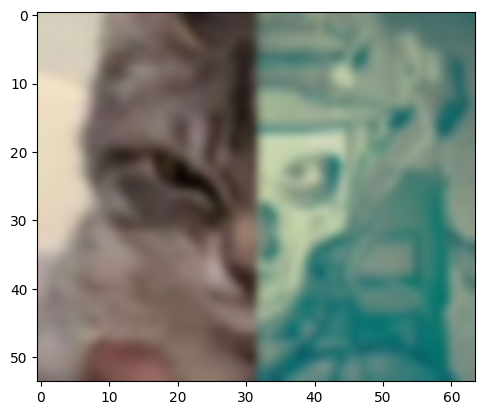

In [40]:
imgplot = plt.imshow(img, interpolation="bicubic")

# Практика 
Взять картинку и вырезать из середины прямоугольный участок. Отрисовать
данный участок и исходную картинку с вырезанным участком.

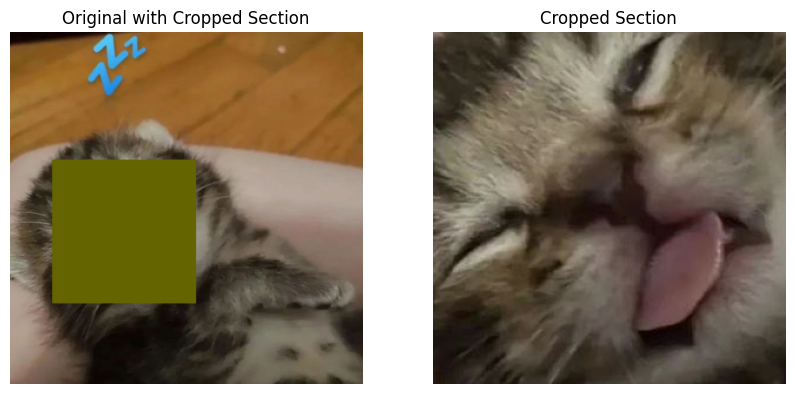

In [19]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

image = Image.open('sleepcat.jpg')

# Преобразуйте изображение в массив numpy для удобства обработки
image_np = np.array(image)

# Получите размеры изображения
height, width, _ = image_np.shape

# Определите размеры прямоугольного участка
rect_width, rect_height = 300, 300  # Измените размеры по необходимости

# Найдите координаты центра изображения
center_x= width // 2 - 130
center_y = height // 2 + 50

# Вычислите координаты прямоугольного участка
left = center_x - rect_width // 2
right = center_x + rect_width // 2
top = center_y - rect_height // 2
bottom = center_y + rect_height // 2

# Вырежьте прямоугольный участок из изображения
cropped_section = image_np[top:bottom, left:right]

# Создайте новое изображение с вырезанным участком
image_with_cropped_section = image_np.copy()
image_with_cropped_section[top:bottom, left:right] = 100, 100, 0

# Преобразуйте массивы numpy обратно в изображения PIL
cropped_image = Image.fromarray(cropped_section)
image_with_cropped_section_image = Image.fromarray(image_with_cropped_section)

# Отобразите изображения
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original with Cropped Section')
plt.imshow(image_with_cropped_section_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Cropped Section')
plt.imshow(cropped_image)
plt.axis('off')

plt.show()